In [45]:
%matplotlib inline

In [46]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
with open('movie_data.txt') as json_file:
    data = json.load(json_file)


In [100]:
productions = {}
production_list = []
production_list_all = []
production_box = {}

for year in list(data.keys()):
    movies = list(data[year].keys())
    production_list = []
    boxes = []
    for movie in movies:
        try:
            production = data[year][movie]['Production'].split(', ')
            box = data[year][movie]['BoxOffice']
            box_vals=[]
            for i in production:
                production_list.append(i)
                boxes.append(box)
                production_list_all.append(i)
                
        except Exception as e:
            print(str(e)+" Year: "+year+" Movie: "+movie)
    productions[year] = production_list
    production_box[year] = boxes

production_df={}
for year in list(data.keys()):
    productionbox={}
    for i in range(len(production_box[year])):
        
        if productions[year][i] not in list(productionbox.keys()):
            productionbox[productions[year][i]] = [production_box[year][i]]
        else:
            productionbox[productions[year][i]].append(production_box[year][i])
    production_df[year] = productionbox

for y in list(production_df.keys()):
    for production in list(production_df[y].keys()):
        production_df[y][production] = {'box_total': sum(production_df[y][production]),
                      'movie_production_count': len(production_df[y][production]),
                      'box_per_movie': sum(production_df[y][production])/len(production_df[y][production])}

# Example
production_df['2020']





        

{'Columbia Pictures': {'box_total': 227527047,
  'movie_production_count': 2,
  'box_per_movie': 113763523.5},
 '2.0 Entertainment': {'box_total': 206305244,
  'movie_production_count': 1,
  'box_per_movie': 206305244.0},
 'Jerry Bruckheimer Films': {'box_total': 206305244,
  'movie_production_count': 1,
  'box_per_movie': 206305244.0},
 'Paramount Pictures': {'box_total': 171144179,
  'movie_production_count': 2,
  'box_per_movie': 85572089.5},
 'Original Film': {'box_total': 148974665,
  'movie_production_count': 1,
  'box_per_movie': 148974665.0},
 'DC Entertainment': {'box_total': 130692488,
  'movie_production_count': 2,
  'box_per_movie': 65346244.0},
 'Clubhouse Pictures (II)': {'box_total': 84158461,
  'movie_production_count': 1,
  'box_per_movie': 84158461.0},
 'Kroll &amp; Co. Entertainment': {'box_total': 84158461,
  'movie_production_count': 1,
  'box_per_movie': 84158461.0},
 'Universal Pictures': {'box_total': 77047065,
  'movie_production_count': 1,
  'box_per_movie': 7

In [49]:
unique_productions = pd.Series(production_list_all).unique()
unique_productions

box_val_time={}
for i in unique_productions:
    rev = []
    for year in list(production_df.keys()):
        try:
            rev.append(production_df[year][i]['box_per_movie'])
        except:
            rev.append(0)
    box_val_time[i] = rev

# Example
box_val_time["Universal Pictures"]


[31082877.25,
 16960640.333333332,
 101549412.66666667,
 30925970.0,
 27305858.5,
 70132027.16666667,
 43675621.0,
 51381336.0,
 55791329.75,
 64523818.571428575,
 61094046.833333336,
 63654199.666666664,
 56482803.75,
 127216615.5,
 56187327.333333336,
 80733903.0,
 115181754.25,
 159208351.33333334,
 46100944.666666664,
 90973238.0,
 143690629.0,
 141489018.0,
 101952886.0,
 86063059.33333333,
 176241941.0,
 110757551.5,
 81761953.0,
 149330974.66666666,
 104328943.33333333,
 0,
 0,
 0,
 0,
 0,
 0,
 366931005.0,
 75395035.0,
 118573623.33333333,
 344407245.5,
 0,
 77047065.0]

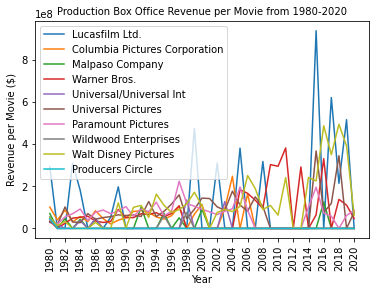

In [101]:
x_vals = list(production_df.keys())
y_vals = []

for production in unique_productions[:10]:
    y_vals = box_val_time[production]
    plt.plot(x_vals,y_vals)

plt.xticks(np.arange(0, 42, step=2),rotation = 90)
plt.xlabel('Year')
plt.ylabel('Revenue per Movie ($)')
plt.legend(unique_productions[:10]);
plt.title('Production Box Office Revenue per Movie from 1980-2020',fontsize=10)
plt.show()

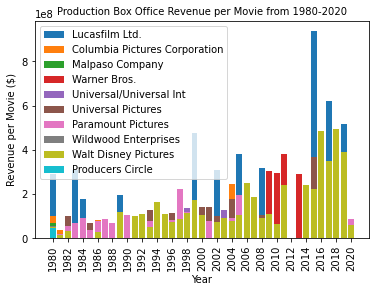

In [53]:
x_vals = list(production_df.keys())
y_vals = []

for production in unique_productions[:10]:
    y_vals = box_val_time[production]
    plt.(x_vals,y_vals)

plt.xticks(np.arange(0, 42, step=2),rotation = 90)
plt.xlabel('Year')
plt.ylabel('Revenue per Movie ($)')
plt.legend(unique_productions[:10]);
plt.title('Production Box Office Revenue per Movie from 1980-2020',fontsize=10)
plt.show()